<a href="https://colab.research.google.com/github/rogerdemori/PosTech_Data_Analytics/blob/main/tech_challenge_DTAT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv('/content/tech-challenge-fiap_fase-2_ibovespa.csv', sep=',')
df.head(10)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,24.08.2023,117.026,118.135,118.136,116.848,"9,20M","-0,94%"
1,23.08.2023,118.135,116.160,118.135,116.159,"11,54M","1,70%"
2,22.08.2023,116.156,114.433,116.286,114.433,"9,83M","1,51%"
3,21.08.2023,114.429,115.404,115.425,114.067,"9,79M","-0,85%"
4,18.08.2023,115.409,114.973,115.729,114.423,"10,60M","0,37%"
5,17.08.2023,114.982,115.592,116.610,114.859,"12,75M","-0,53%"
6,16.08.2023,115.592,116.171,117.338,115.534,"18,86M","-0,50%"
7,15.08.2023,116.171,116.809,117.697,116.033,"14,64M","-0,55%"
8,14.08.2023,116.810,118.067,118.082,116.530,"11,20M","-1,06%"
9,11.08.2023,118.065,118.350,119.054,117.415,"11,87M","-0,24%"


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3381 entries, 0 to 3380
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      3381 non-null   object 
 1   Último    3381 non-null   float64
 2   Abertura  3381 non-null   float64
 3   Máxima    3381 non-null   float64
 4   Mínima    3381 non-null   float64
 5   Vol.      3380 non-null   object 
 6   Var%      3381 non-null   object 
dtypes: float64(4), object(3)
memory usage: 185.0+ KB


In [66]:
df.isnull().sum()


Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        1
Var%        0
dtype: int64

In [67]:
df[df['Vol.'].isna()]


,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
1872,10.02.2016,40.377,40.592,40.592,39.96,NaN,"-0,53%"


In [68]:
df['Vol.'] = df['Vol.'].fillna(0)

In [69]:
df['Data'] = pd.to_datetime(df['Data'],format='%d.%m.%Y')
df.head(10)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2023-08-24,117.026,118.135,118.136,116.848,"9,20M","-0,94%"
1,2023-08-23,118.135,116.160,118.135,116.159,"11,54M","1,70%"
2,2023-08-22,116.156,114.433,116.286,114.433,"9,83M","1,51%"
3,2023-08-21,114.429,115.404,115.425,114.067,"9,79M","-0,85%"
4,2023-08-18,115.409,114.973,115.729,114.423,"10,60M","0,37%"
5,2023-08-17,114.982,115.592,116.610,114.859,"12,75M","-0,53%"
6,2023-08-16,115.592,116.171,117.338,115.534,"18,86M","-0,50%"
7,2023-08-15,116.171,116.809,117.697,116.033,"14,64M","-0,55%"
8,2023-08-14,116.810,118.067,118.082,116.530,"11,20M","-1,06%"
9,2023-08-11,118.065,118.350,119.054,117.415,"11,87M","-0,24%"


In [70]:
df['Último'] = df['Último'] * 1000
df['Último'] = df['Último'].astype(int)
df['Abertura'] = df['Abertura'] * 1000
df['Abertura'] = df['Abertura'].astype(int)
df['Máxima'] = df['Máxima'] * 1000
df['Máxima'] = df['Máxima'].astype(int)
df['Mínima'] = df['Mínima'] * 1000
df['Mínima'] = df['Mínima'].astype(int)
df['Vol.'] = df['Vol.'].str[:-1]
df['Var%'] = df['Var%'].str[:-1]
df['Vol.'] = df['Vol.'].str.replace(',','.')
df['Var%'] = df['Var%'].str.replace(',','.')
df['Vol.'] = df['Vol.'].astype(float)
df['Var%'] = df['Var%'].astype(float)
df['Vol.'] = df['Vol.'] * 1000000
df['Var%'] = df['Var%']/100
df.head(10)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2023-08-24,117026,118135,118136,116848,9200000.0,-0.0094
1,2023-08-23,118135,116160,118135,116159,11540000.0,0.0170
2,2023-08-22,116156,114433,116286,114433,9830000.0,0.0151
3,2023-08-21,114429,115404,115425,114067,9790000.0,-0.0085
4,2023-08-18,115409,114973,115729,114423,10600000.0,0.0037
5,2023-08-17,114982,115592,116610,114859,12750000.0,-0.0053
6,2023-08-16,115592,116171,117338,115534,18860000.0,-0.0050
7,2023-08-15,116171,116809,117697,116033,14640000.0,-0.0055
8,2023-08-14,116810,118067,118082,116530,11200000.0,-0.0106
9,2023-08-11,118065,118350,119054,117415,11870000.0,-0.0024


In [71]:
df = df.set_index(['Data'])
df.head(10)

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2023-08-24,117026,118135,118136,116848,9200000.0,-0.0094
2023-08-23,118135,116160,118135,116159,11540000.0,0.0170
2023-08-22,116156,114433,116286,114433,9830000.0,0.0151
2023-08-21,114429,115404,115425,114067,9790000.0,-0.0085
2023-08-18,115409,114973,115729,114423,10600000.0,0.0037
2023-08-17,114982,115592,116610,114859,12750000.0,-0.0053
2023-08-16,115592,116171,117338,115534,18860000.0,-0.0050
2023-08-15,116171,116809,117697,116033,14640000.0,-0.0055
2023-08-14,116810,118067,118082,116530,11200000.0,-0.0106


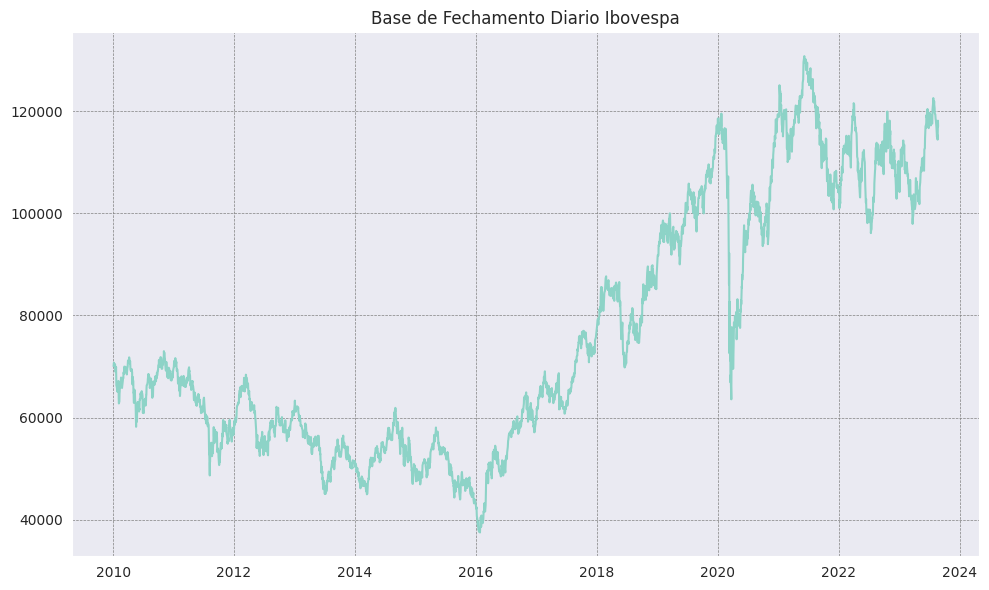

In [107]:
sns.set_style("darkgrid")
sns.set_palette("Set3")
plt.figure(figsize=(10,6))
plt.title('Base de Fechamento Diario Ibovespa')
plt.plot(df['Último'])
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()

In [84]:
df_base = df[['Último']].astype(float)
df_base.head()

,Último
Data,
2023-08-24,117026.0
2023-08-23,118135.0
2023-08-22,116156.0
2023-08-21,114429.0
2023-08-18,115409.0


In [85]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3381 entries, 2023-08-24 to 2010-01-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Último  3381 non-null   float64
dtypes: float64(1)
memory usage: 52.8 KB


<ipython-input-97-605975907cbd>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_base, shade=True)


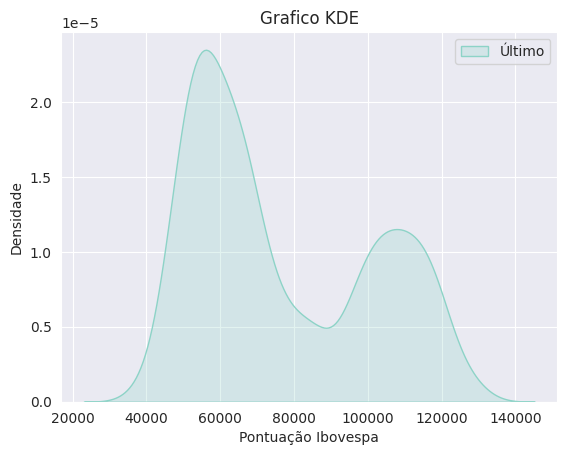

In [97]:
data = sns.load_dataset("iris")
# Criando um gráfico KDE
sns.kdeplot(data=df_base, shade=True)
plt.xlabel('Pontuação Ibovespa')
plt.ylabel('Densidade')
plt.title('Grafico KDE')
plt.show()

In [114]:
df_log = np.log(df_base)

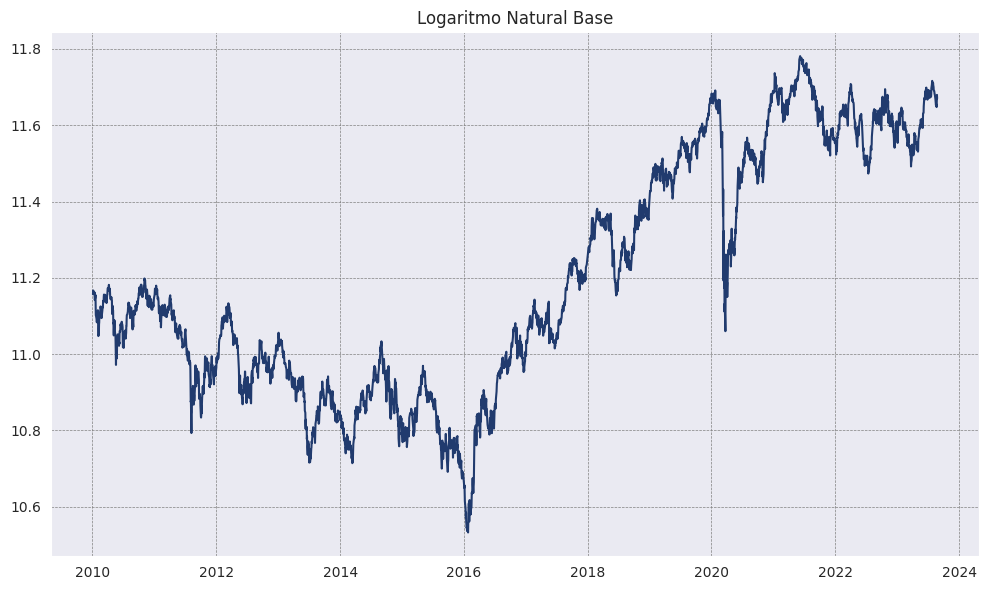

In [115]:
sns.set_style("dark")
sns.set_palette("cividis")
plt.figure(figsize=(10,6))
plt.title('Logaritmo Natural Base')
plt.plot(df_log)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()

In [116]:
from statsmodels.tsa.stattools import adfuller

In [117]:
X = df_base.values

In [118]:
result = adfuller(X)

print("Teste ADF")
print(f"Teste Estatístico: {result[0]}")
print(f"P-Value: {result[1]}")
print("Valores críticos:")

for key, value in result[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -2.0209970905801833
P-Value: 0.27744316359019405
Valores críticos:
	1%: -3.4322925020735493
	5%: -2.86239828444062
	10%: -2.567226881501505


In [138]:
rolling_mean = df_base.rolling(12).mean()
rolling_mean_log = df_log.rolling(12).mean()

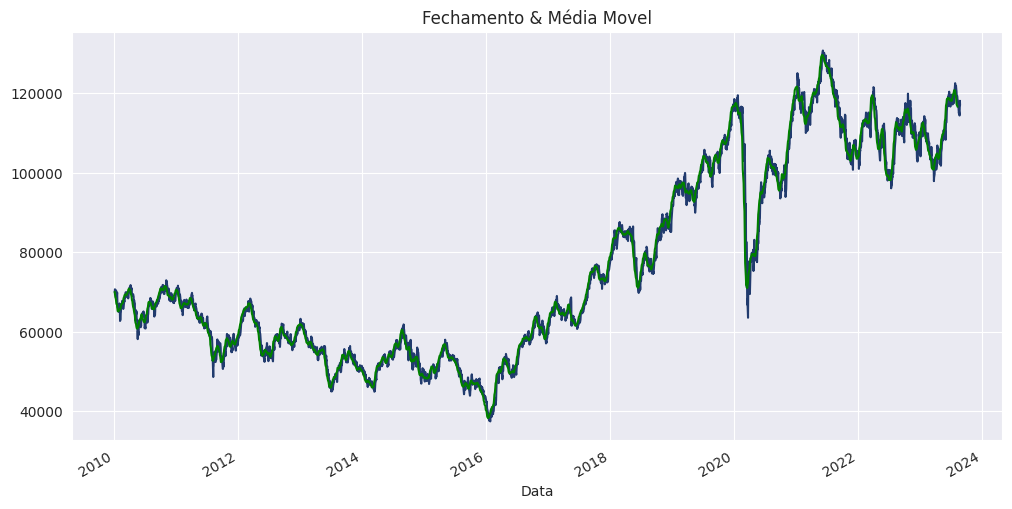

<Figure size 1000x600 with 0 Axes>

In [163]:
f, ax = plt.subplots(figsize=(12, 6))
df_base.plot(ax=ax, legend=False)
rolling_mean.plot(ax=ax, legend=False, color='g')
plt.title('Fechamento & Média Movel')
plt.grid(True)
plt.figure(figsize=(10,6))
plt.tight_layout()

In [140]:
rolling_std = df_base.rolling(12).std()
rolling_std_log =  df_log.rolling(12).std()

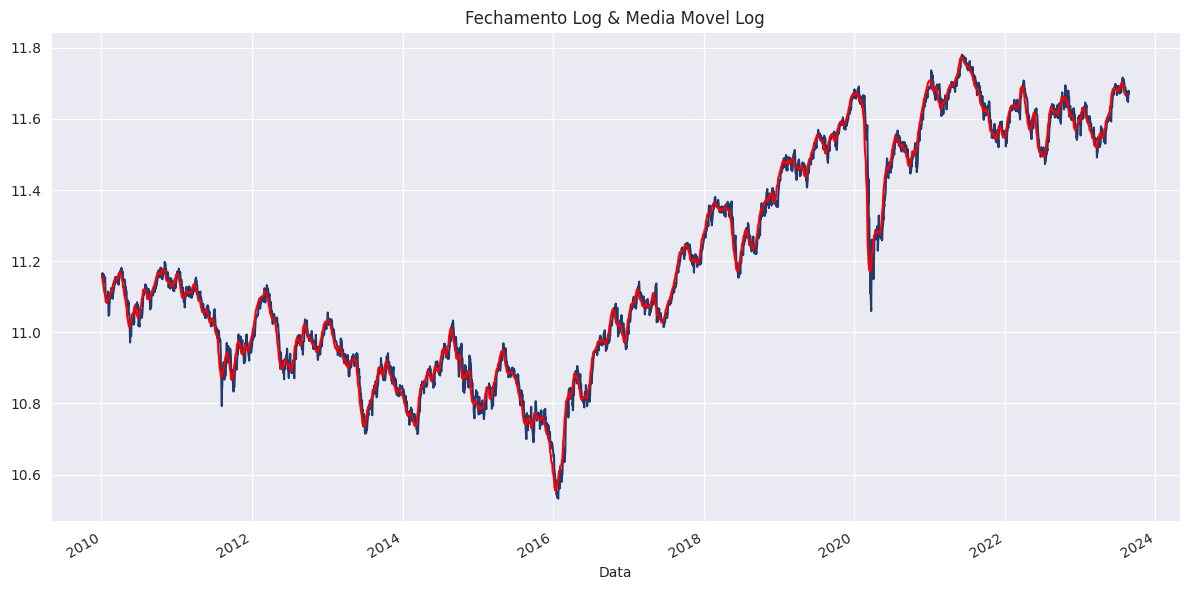

In [164]:
f, ax = plt.subplots(figsize=(12, 6))
df_log.plot(ax=ax, legend=False)
rolling_mean_log.plot(ax=ax, legend=False, color='r')
plt.grid(True)
plt.title('Fechamento Log & Media Movel Log')
plt.tight_layout()

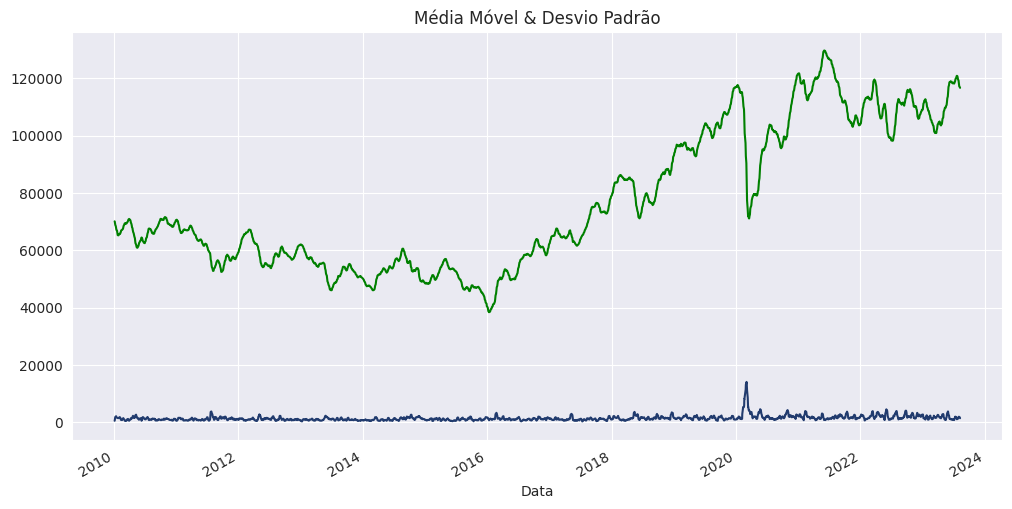

<Figure size 1000x600 with 0 Axes>

In [161]:
f, ax = plt.subplots(figsize=(12, 6))
rolling_std.plot(ax=ax, legend=False)
rolling_mean.plot(ax=ax, legend=False, color='g')
plt.title('Média Móvel & Desvio Padrão')
plt.grid(True)
plt.figure(figsize=(10,6))
plt.tight_layout()

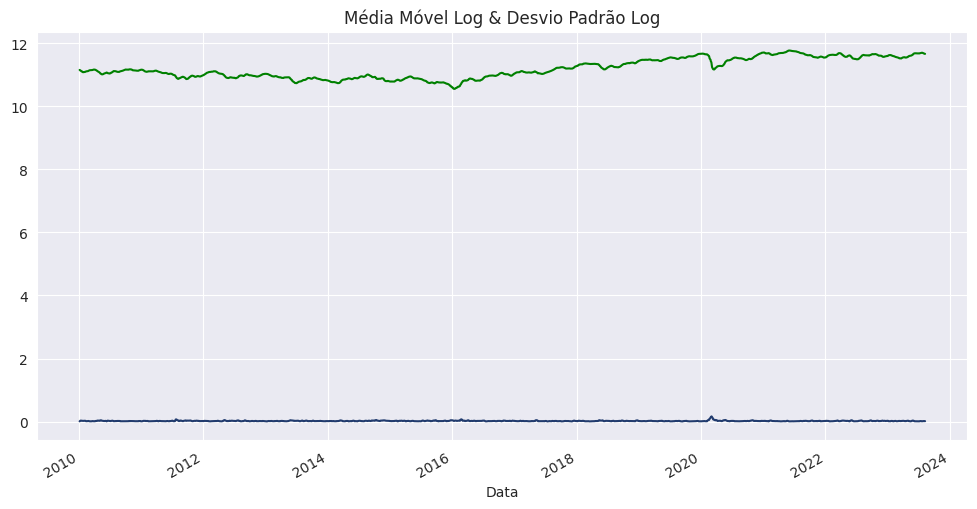

<Figure size 1000x600 with 0 Axes>

In [165]:
f, ax = plt.subplots(figsize=(12, 6))
rolling_std_log.plot(ax=ax, legend=False)
rolling_mean_log.plot(ax=ax, legend=False, color='g')
plt.title('Média Móvel Log & Desvio Padrão Log')
plt.grid(True)
plt.figure(figsize=(10,6))
plt.tight_layout()

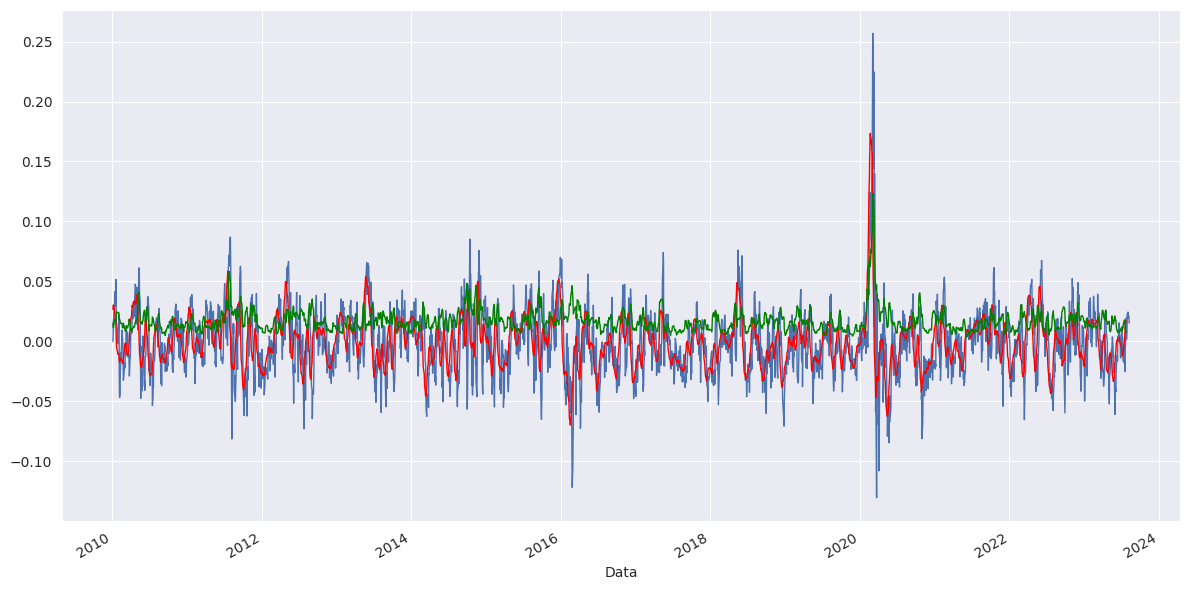

In [187]:
df_s = (df_log - rolling_mean_log).dropna()

ma_s = df_s.rolling(12).mean()

std = df_s.rolling(12).std()

sns.set_style('darkgrid')
sns.set_palette("deep")

f, ax = plt.subplots(figsize=(12, 6))
df_s.plot(ax=ax, legend=False, linewidth=1)
ma_s.plot(ax=ax, legend=False, color='r', linewidth=1)
std.plot(ax=ax, legend=False, color='g', linewidth=1)
plt.tight_layout()

In [176]:
X_s = df_s.values
result_s = adfuller(X_s)

print("Teste ADF")
print(f"Teste Estatístico: {result_s[0]}")
print(f"P-Value: {result_s[1]}")
print("Valores críticos:")

for key, value in result_s[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -15.021725394008717
P-Value: 1.0200167419857611e-27
Valores críticos:
	1%: -3.432296549639788
	5%: -2.8624000722521807
	10%: -2.567227833288095


Teste ADF
Teste Estatístico: -18.152239599287277
P-Value: 2.4741225128522567e-30
Valores críticos:
	1%: -3.432307621401763
	5%: -2.862404962641299
	10%: -2.5672304368122156


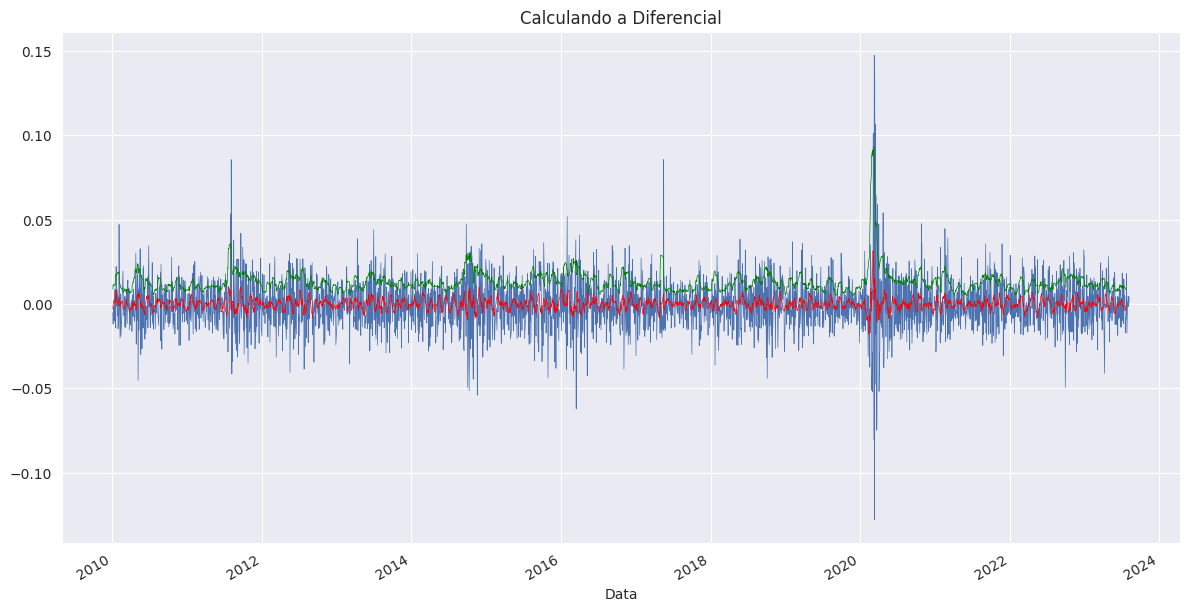

In [185]:
df_diff = df_s.diff(1)
ma_diff = df_diff.rolling(12).mean()

std_diff = df_diff.rolling(12).std()


f, ax = plt.subplots(figsize=(12, 6))
df_diff.plot(ax=ax, legend=False, linewidth=0.5)
ma_diff.plot(ax=ax, legend=False, color='r', linewidth=0.5)
std_diff.plot(ax=ax, legend=False, color='g', linewidth=0.5)
plt.tight_layout()
plt.title('Calculando a Diferencial')

X_diff = df_diff.dropna().values
result_diff = adfuller(X_diff)

print("Teste ADF")
print(f"Teste Estatístico: {result_diff[0]}")
print(f"P-Value: {result_diff[1]}")
print("Valores críticos:")

for key, value in result_diff[4].items():
  print(f"\t{key}: {value}")